In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
with open('../data/latest_timestamp.txt', 'r') as f:
    latest_timestamp = f.read().strip()

file_path = f'../data/processed/cleaned_movies_{latest_timestamp}.parquet'
df = pd.read_parquet(file_path)
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,runtime,overview,spoken_languages,poster_path,cast,cast_size,director,crew_size,profit_musd,roi
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure | Science Fiction | Action,The Avengers Collection,en,356.0,2799.439100,Marvel Studios,...,181,After the devastating events of Avengers: Infi...,en | ja | xh,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",105,"Anthony Russo, Joe Russo",593,2443.44,2443.44
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action | Adventure | Fantasy | Science Fiction,Avatar Collection,en,237.0,2923.706026,Dune Entertainment | Lightstorm Entertainment ...,...,162,"In the 22nd century, a paraplegic Marine is di...",en | es,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",65,James Cameron,986,2686.71,2686.71
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,Adventure | Action | Science Fiction,Star Wars Collection,en,245.0,2068.223624,Lucasfilm Ltd. | Bad Robot,...,136,Thirty years after defeating the Galactic Empi...,en,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",182,J.J. Abrams,257,1823.22,1823.22
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,Adventure | Action | Science Fiction,The Avengers Collection,en,300.0,2052.415039,Marvel Studios,...,149,As the Avengers and their allies have continue...,en | xh,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,"Robert Downey Jr., Chris Evans, Chris Hemswort...",69,"Anthony Russo, Joe Russo",724,1752.42,1752.42
4,597,Titanic,Nothing on Earth could come between them.,1997-11-18,Drama | Romance,NaN,en,200.0,2264.162353,Paramount Pictures | 20th Century Fox | Lights...,...,194,101-year-old Rose DeWitt Bukater tells the sto...,en | fr | de | sv | it | ru,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",116,James Cameron,258,2064.16,2064.16


In [5]:
def create_visualization(df, output_dir="reports/figures"):
    """Generate and save visualizations for movie analysis results."""

    os.makedirs(output_dir, exist_ok=True)

    # Revenue vs Budget trends 
    print("Plot Revenue vs Budget trends")
    plt.figure(figsize=(12, 8))
    plt.scatter(df['budget_musd'], df['revenue_musd'], alpha=0.5, c='blue', edgecolors='w', s=100)
    plt.xlabel('Budget $M')
    plt.ylabel('Revenue $M')
    plt.title('Revenue vs Budget Trends')
    plt.grid(True, linestyle='--', alpha=0.7)
    # plt.savefig(os.path.join(output_dir, 'revenue_vs_budget.png'), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # ROI Distribution by Genre (Box Plot)
    genre_df = df.assign(genres=df['genres'].str.split(' | ')).explode('genres')
    top_genres = genre_df['genres'].value_counts().head(10).index
    roi_by_genre = [genre_df[genre_df['genres'] == genre]['roi'].dropna() for genre in top_genres]

    print(f"Plot ROI Distribution by Genre for top genres")
    plt.figure(figsize=(12, 8))
    plt.boxplot(roi_by_genre, tick_labels=top_genres, vert=True, patch_artist=True, showfliers=False)
    plt.xlabel('ROI (Revenue / Budget)', fontsize=12)
    plt.ylabel('Genre', fontsize=12)
    plt.title('ROI Distribution by Genre (Top 10 Genres)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    # plt.savefig(os.path.join(output_dir, 'roi_by_genre.png'), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # Popularity vs Rating (Scatter Plot)
    print("Plot Popularity vs Rating")
    plt.figure(figsize=(12, 8))
    plt.scatter(df['popularity'], df['vote_average'], alpha=0.5, c='green', edgecolors='w', s=100)
    plt.xlabel('Popularity')
    plt.ylabel('Rating')
    plt.title('Popularity vs Rating')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    # plt.savefig(os.path.join(output_dir, 'popularity_vs_rating.png'), dpi=300, bbox_inches='tight')
    plt.close()

    # Yearly Trends in Box Office Performance (Line Plot)
    df['year'] = df['release_date'].dt.year
    yearly_performance = df.groupby('year').agg({
        'revenue_musd' : 'mean',
        'budget_musd' : 'mean'
    }).dropna()

    print("Plot Yearly Trends in Box Office Performance")
    plt.figure(figsize=(12, 8))
    plt.plot(yearly_performance.index, yearly_performance['revenue_musd'], label='Revenue', marker='o')
    plt.plot(yearly_performance.index, yearly_performance['budget_musd'], label='Budget', marker='o')
    plt.xlabel('Year')
    plt.ylabel('Amount $M')
    plt.title('Yearly Trends in Box Office Performance')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    # plt.savefig(os.path.join(output_dir, 'yearly_trends.png'), dpi=300, bbox_inches='tight')
    plt.close()
    
    print("Plot Franchise vs Standalone Success")   
    franchise_df = df[df['belongs_to_collection'].notna()]
    standalone_df = df[df['belongs_to_collection'].isna()]
    metrics = ['mean_revenue', 'mean_budget', 'mean_roi', 'mean_popularity', 'mean_rating']
    franchise_values = [
        franchise_df['revenue_musd'].mean(),
        franchise_df['budget_musd'].mean(),
        franchise_df['roi'].mean(),
        franchise_df['popularity'].mean(),
        franchise_df['vote_average'].mean()
    ]
    standalone_values = [
        standalone_df['revenue_musd'].mean(),
        standalone_df['budget_musd'].mean(),
        standalone_df['roi'].mean(),
        standalone_df['popularity'].mean(),
        standalone_df['vote_average'].mean()
    ]

    
    x = np.arange(len(metrics))  # the label locations
    width = 0.35
    plt.figure(figsize=(12, 8))
    plt.bar(x - width/2, franchise_values, width, label='Franchise', color='skyblue')
    plt.bar(x + width/2, standalone_values, width, label='Standalone', color='salmon')
    plt.ylabel('Average Values', fontsize=12)
    plt.xlabel('Metrics', fontsize=12)
    plt.title('Franchise vs Standalone Success', fontsize=14)
    plt.xticks(x, ['Mean Revenue', 'Mean Budget', 'Mean ROI', 'Mean Popularity', 'Mean Rating'], rotation=45, ha='right')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    # plt.savefig(os.path.join(output_dir, 'franchise_vs_standalone.png'), dpi=300, bbox_inches='tight')
    plt.close()

    print(f"Visualization saved to {output_dir}")
    

    

Plot Revenue vs Budget trends


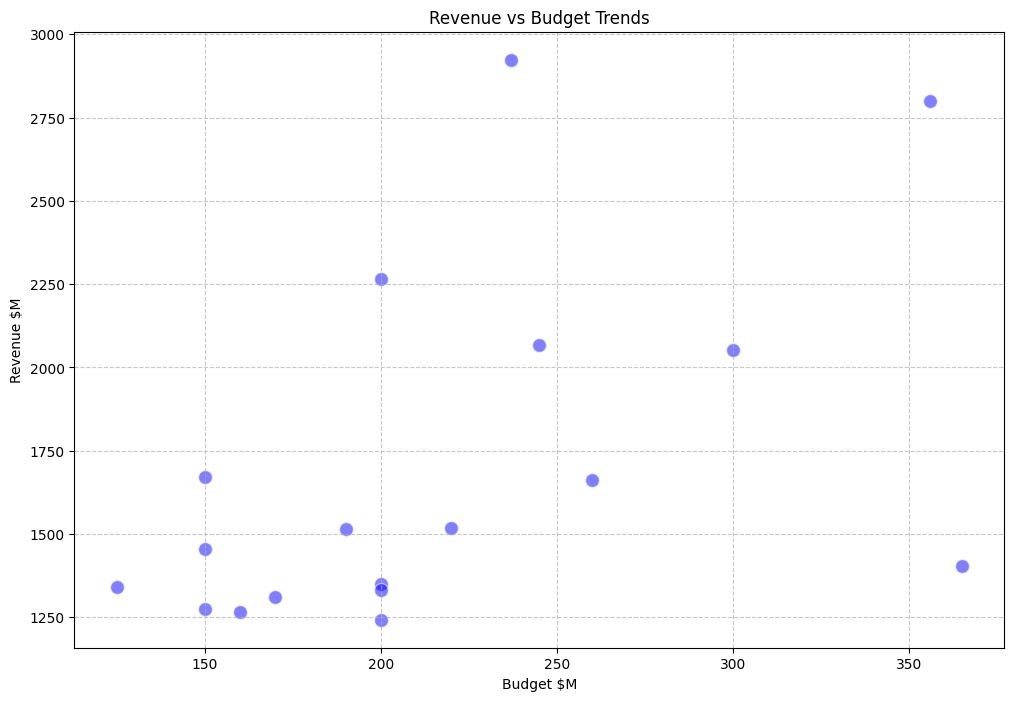

Plot ROI Distribution by Genre for top genres


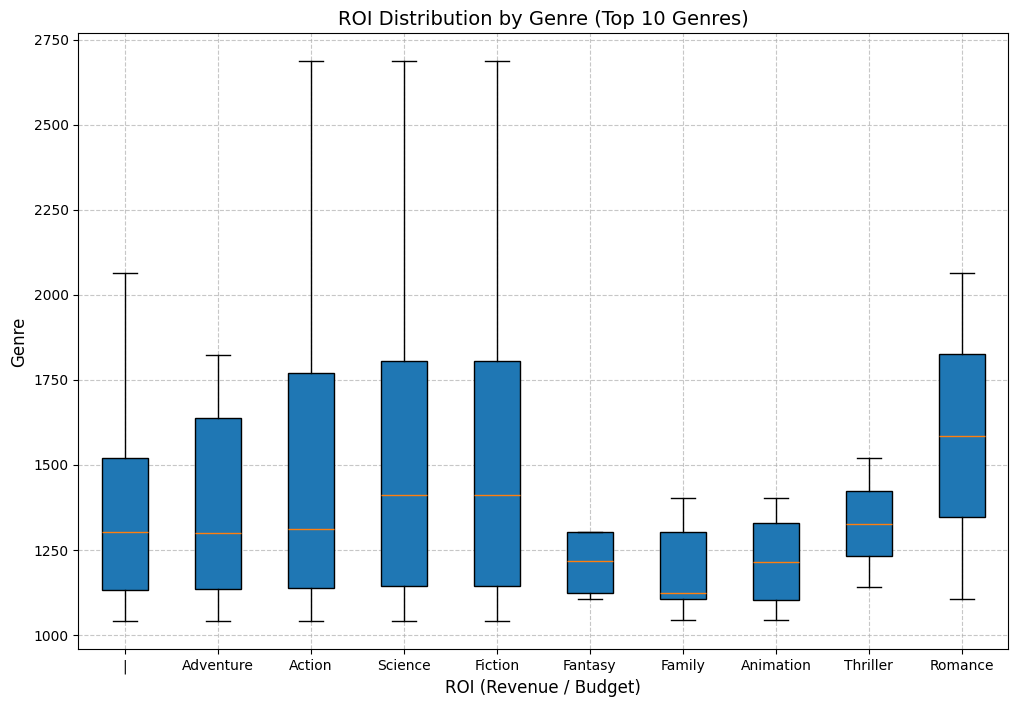

Plot Popularity vs Rating


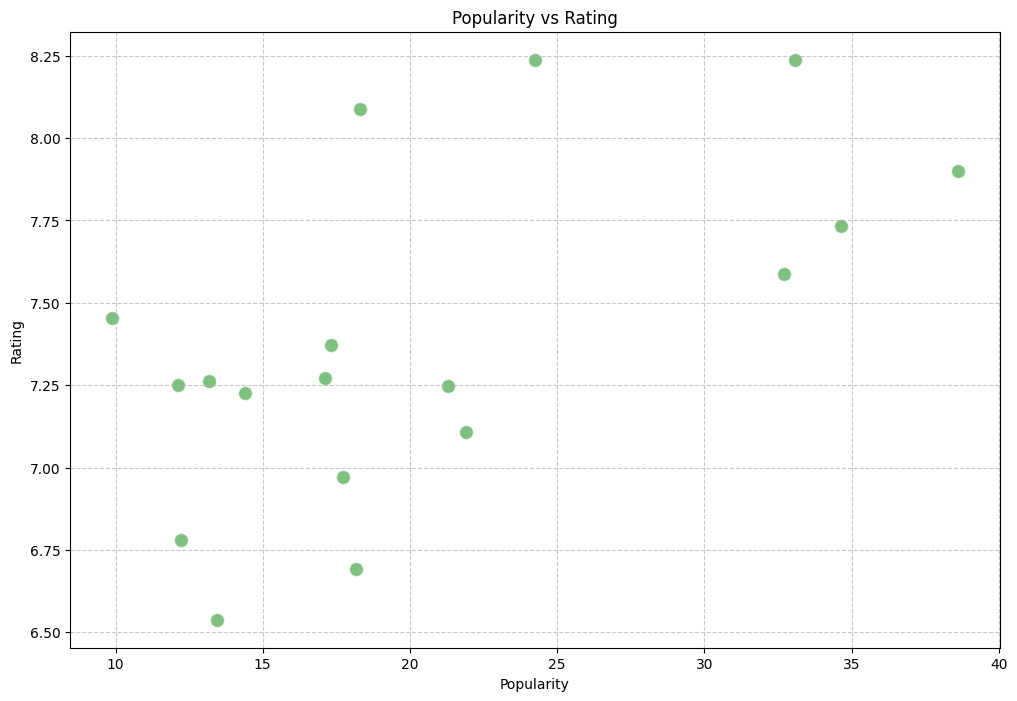

Plot Yearly Trends in Box Office Performance


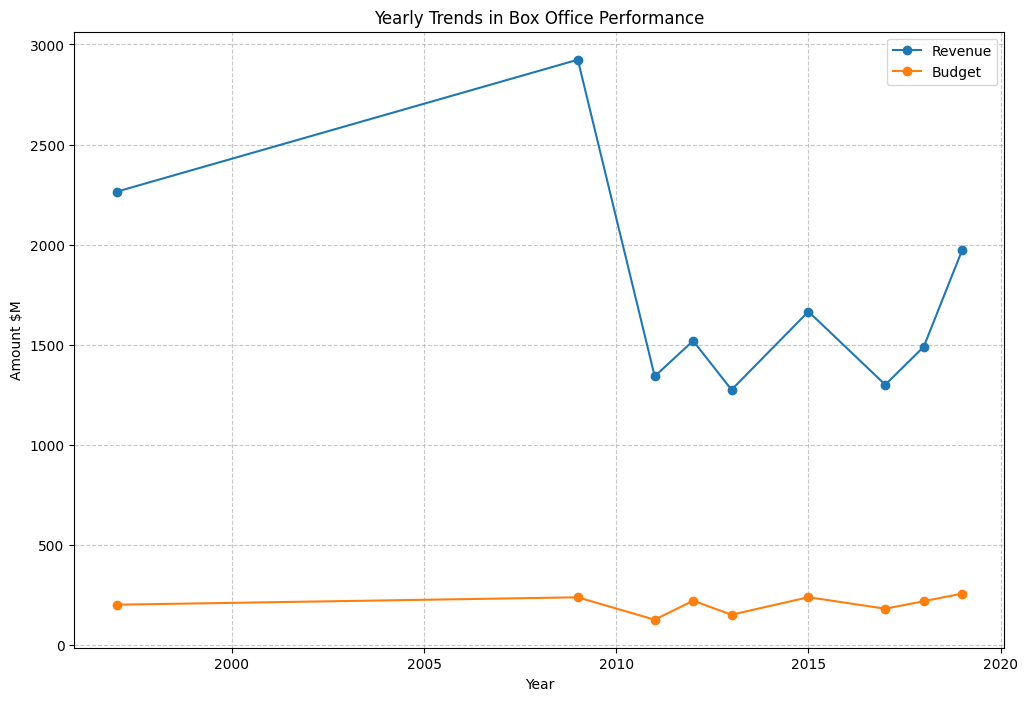

Plot Franchise vs Standalone Success


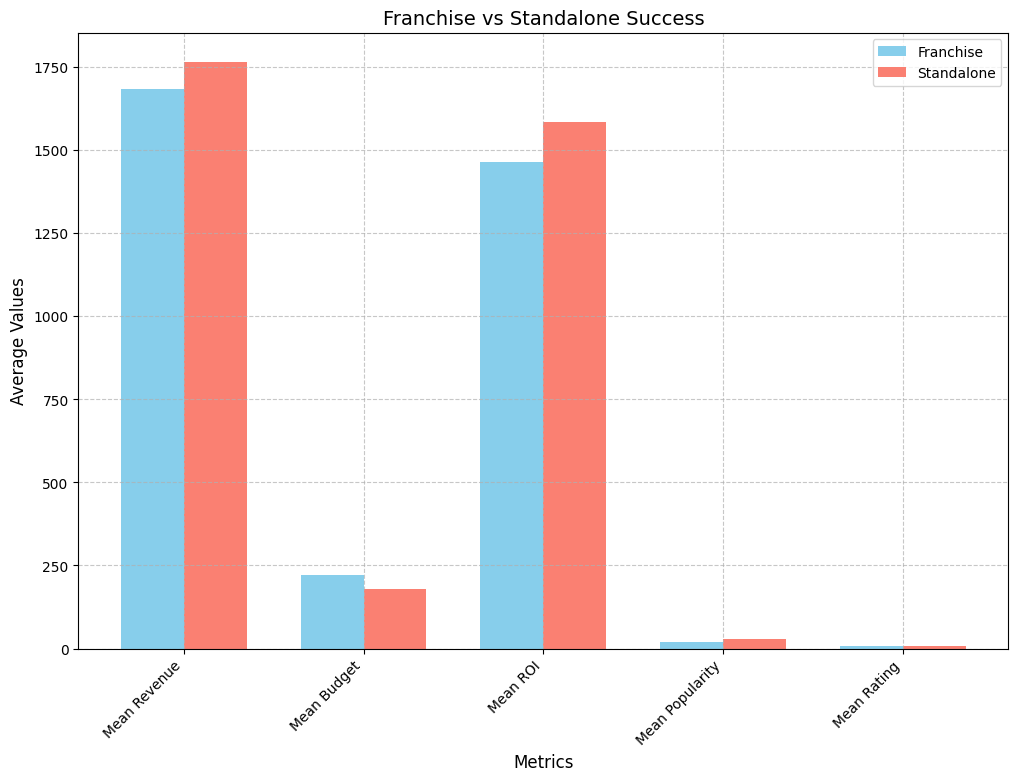

Visualization saved to reports/figures


In [6]:
create_visualization(df)

In [57]:
def roi_distribution_by_genre(df, output_dir="reports/figures"):
    os.makedirs(output_dir, exist_ok=True)
    genres = df['genres'].str.split(' | ', expand=True).stack().unique()
    roi_by_genre = {
        genre: df[df['genres'].str.contains(genre, na=False)]['roi'].dropna()
        for genre in genres if genre
    }
    plt.figure(figsize=(12, 8))
    for genre, roi in roi_by_genre.items():
        plt.hist(roi, bins=30, alpha=0.5, label=genre)
    plt.xlabel('ROI')
    plt.ylabel('Frequency')
    plt.title('ROI Distribution by Genre')
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig(os.path.join(output_dir, 'roi_distribution_by_genre.png'), dpi=300, bbox_inches='tight')
    plt.show()